## 2. Information Diagram

Author: Cheuk Ting Li  (https://staff.ie.cuhk.edu.hk/~ctli/)

<< Back to [table of contents](table_of_contents.ipynb)

In [1]:
# If you are running this on Google Colab, uncomment and run the following:

# !apt-get install libgmp-dev python3-dev
# !pip install psitip

In [19]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
from matplotlib import cm
from psitip import *
PsiOpts.setting(
    solver = "ortools.GLOP",    # Set linear programming solver
    str_style = "std",          # Conventional notations in output
    solve_display_reg = True,   # Display claims in solve commands
    proof_note_color = "blue",  # Reasons in proofs are blue
    str_float = True,           # Print floating points, not fractions
    random_seed = 123,          # Random seed
    figsize = (6,6)             # Default figure size for info diagrams
)
X, Y, Z, W, U, K = rv("X, Y, Z, W, U, K")  # Declare random variables

## 2.1 - Information Diagram

There is a correspondence between sets and information measures. By translating set union to joint random variable, set intersection as mutual information, and set difference as conditioning, we can turn a linear equality about set cardinalities to an equality about information measures. This is known as Hu's Theorem [Hu 1962]. For example, this equality about sets:
$$|A \backslash B| + |A \cap B|  = |A|$$
corresponds to this equality about information measures:
$$H(X|Y)+I(X;Y)=H(X)$$
This appears to suggest that a random variable can be regarded as merely a "set of bits". For example, if there are $10$ i.i.d. fair bits $T_1,\ldots,T_{10}$, $X=(T_1,\ldots,T_8)$, $Y=(T_6,\ldots,T_{10})$, then we have $H(X)=8=|\{1,\ldots,8\}|$, $H(X|Y)=5=|\{1,\ldots,8\} \backslash \{6,\ldots,10\}|$, and $I(X;Y)=3=|\{1,\ldots,8\} \cap \{6,\ldots,10\}|$. This view is incorrect, as we have seen in the previous chapter that the difference and intersection random variable do not necessarily exist. Nevertheless, Hu's Theorem is a useful mnemonic for the relations between information measures. Note that the correspondence between sets cardinalities and information measures might not work for inequalities. This will be discussed later.

Using this correspondence, for random variables $X,Y$, we can assign a number to each of the $3$ cells in the Venn diagram with $2$ sets. The numbers assigned are $H(X|Y)$ to the cell "$X\backslash Y$", $H(Y|X)$ to the cell "$Y\backslash X$", and $I(X;Y)$ to the cell "$X \cap Y$". This gives a measure over the 3 cells, which is known as the **I-measure** [Yeung 2008].

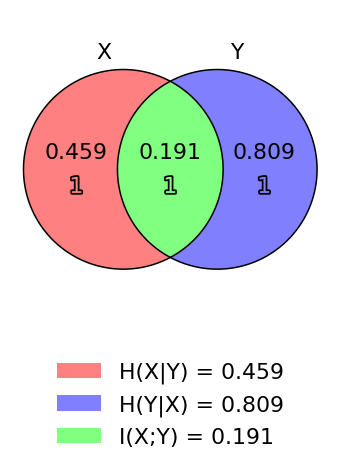

In [3]:
P = ConcModel()
P[X,Y] = [[0,   1/6],  # Probability table of (X,Y)
          [1/2, 1/3]]

# 3 decimal places for numbers, disable color map
P.venn(H(X|Y), H(Y|X), I(X&Y), style = "dp3,nocval_color")

The value of other information measures are obtained as the sums of the corresponding cells. For example, we have $H(X)=H(X|Y)+I(X;Y)$.

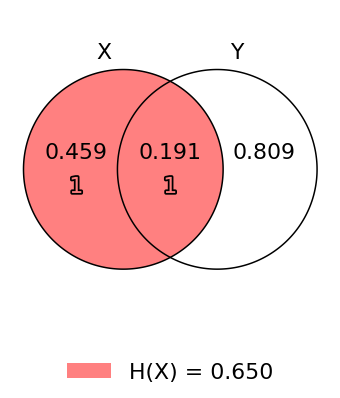

In [4]:
P.venn(H(X), style = "dp3,nocval_color")

We have $H(X,Y)=H(X|Y)+H(Y|X)+I(X;Y)$.

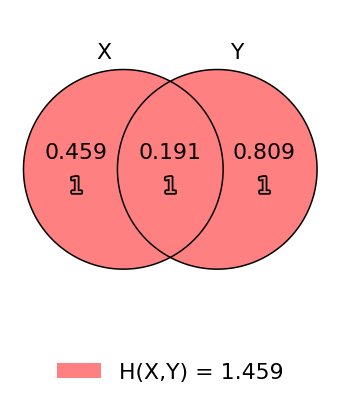

In [5]:
P.venn(H(X,Y), style = "dp3,nocval_color")

----------------

## 2.2 - Information Diagram for 3 Random Variables

Similarly, for $3$ random variables $X,Y,Z$, we can assign a number to each of the $7$ cells in the Venn diagram with $3$ sets. The numbers assigned are $H(X|Y,Z)$ to the cell "$X\backslash (Y\cup Z)$", $I(X;Y|Z)$ to the cell "$(X \cap Y)\backslash Z$", etc. The new quantity here is the one corresponding to the intersection of the $3$ sets, which is the **multivariate mutual information** $I(X;Y;Z)$ [McGill 1954]. It is a generalization of the mutual information to more than 2 random variables. Analogous to $|A\cap B\cap C| = |A\cap B|-|(A\cap B)\backslash C|$, we have
\begin{align}
I(X;Y;Z) &= I(X;Y)-I(X;Y|Z)\\
&= I(X;Z)-I(X;Z|Y)\\
&= I(Y;Z)-I(Y;Z|X)\\
\end{align}


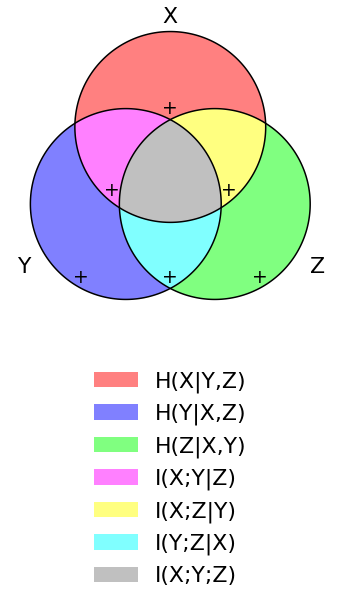

In [6]:
region().venn(H(X|Y,Z), H(Y|X,Z), H(Z|X,Y), I(X&Y|Z), I(X&Z|Y), I(Y&Z|X), I(X&Y&Z), 
              style="notext", color = "l_r,l_b,l_g,l_m,l_y,l_c,l_gray")

We have seen that conditioning may increase or decrease mutual inforamtion, so $I(X;Y;Z) = I(X;Y)-I(X;Y|Z)$ may be positive or negative. It is the only one of the 7 cells in the diagram that can be negative. This highlights the difference between random variables and sets, as the cardinality of the intersection of sets is always nonnegative. The I-measure is generally a signed measure where the measure of a cell may be negative [Yeung 2008].

For an example where $I(X;Y;Z)$ is negative, we again study the example $X,Y \sim \mathrm{Bern}(1/2)$ i.i.d., and $Z = X \oplus Y$ (addition mod 2), then $I(X;Y|Z)=1$, $I(X;Y)=0$.

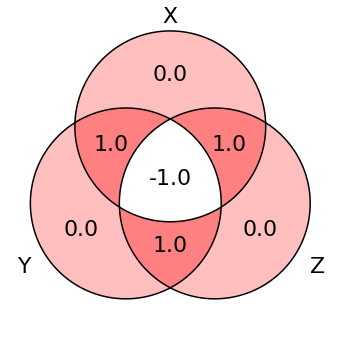

In [7]:
P = ConcModel()
P[X] = [1/2, 1/2]
P[Y] = [1/2, 1/2]
P[Z|X,Y] = lambda x, y: (x + y) % 2
P.venn(style = "dp1")

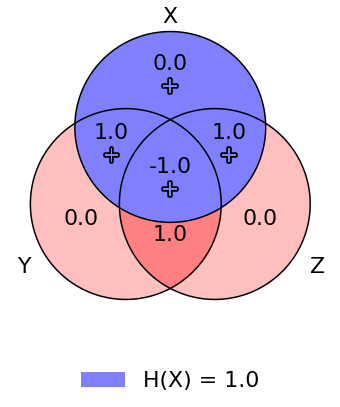

In [8]:
P.venn(H(X), style = "dp1,pm")  # H(X) = sum of the 4 cells in the region

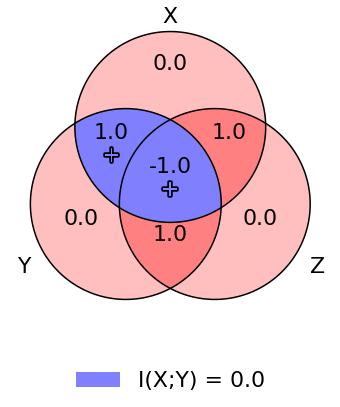

In [9]:
P.venn(I(X & Y), style = "dp1,pm")  # I(X;Y) = sum of the 2 cells in the region
# We can see that I(X;Y)=0, i.e., X,Y are independent, even if those two cells are nonzero

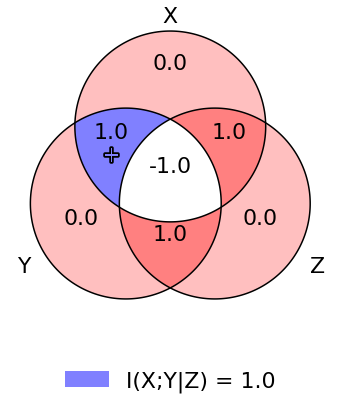

In [10]:
P.venn(I(X & Y | Z), style = "dp1,pm")  # I(X;Y|Z) = 1

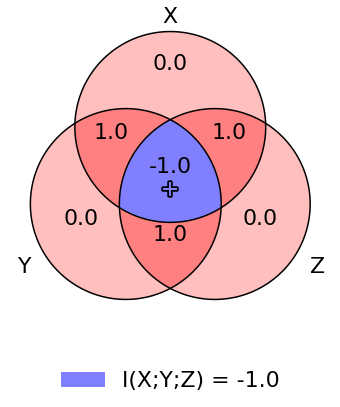

In [11]:
P.venn(I(X & Y & Z), style = "dp1,pm")  # I(X;Y;Z) = -1 is negative

### Example 2.2.1 - Concavity of $I(X;Y)$ in $p_X$

Write $I(p_X,p_{Y|X})=I(X;Y)$ when $(X,Y)$ follows $p_X(x)p_{Y|X}(y|x)$. We will prove that for any fixed $p_{Y|X}$, $I(p_X,p_{Y|X})$ is a concave function of $p_X$. Consider probability mass functions $p_X^{(1)},\ldots ,p_X^{(n)}$ over the same set, and a random integer $K \in \{1,\ldots,n\}$ with probability mass function $p_K$. The concavity of $I(p_X,p_{Y|X})$ in $p_X$ means that
$$\mathbf{E}_K[I(p_X^{(K)},p_{Y|X})] \le I(\mathbf{E}_K[p_X^{(K)}],p_{Y|X})$$
where $\mathbf{E}_K[p_X^{(K)}]$ is the function $x \mapsto \mathbf{E}_K[p_X^{(K)}(x)]$, i.e., the weighted average of the pmfs $p_X^{(1)},\ldots ,p_X^{(n)}$, which is also a probability mass function.

Assume $X$ is generated according to $p_X^{(K)}$ conditional on $K$, i.e., $p_{X|K}(x|k)=p_X^{(k)}(x)$, and $Y$ is generated conditional on $X$ according to $p_{Y|X}$, conditionally independently of $K$ given $X$. We can check that $p_X = \mathbf{E}_K[p_X^{(K)}]$, and hence $I(\mathbf{E}_K[p_X^{(K)}],p_{Y|X})=I(X;Y)$. By definition of conditional mutual information, $\mathbf{E}_K[I(p_X^{(K)},p_{Y|X})]=I(X;Y|K)$. 

Therefore, it is left to prove that $I(K;Y|X)=0$ implies $I(X;Y|K) \le I(X;Y)$.

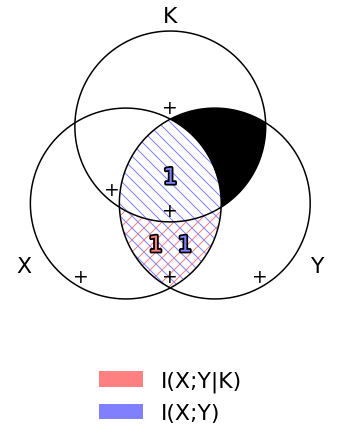

In [21]:
(I(K&Y|X) == 0).venn(I(X&Y|K), I(X&Y), style="hatch")

Since $I(K;Y)=I(K;Y|X)+I(X;Y;K)\ge 0$, we have $I(X;Y;K)\ge 0$, and hence $I(X;Y)=I(X;Y;K)+I(X;Y|K)\ge I(X;Y|K)$. We can also ask the program to prove it for us.

In [25]:
((I(K&Y|X) == 0) >> (I(X&Y|K) <= I(X&Y))).solve(full=True, proof_detail=True)

((  markov(K, X, Y)  )
>> (  I(X&Y|K) <= I(X&Y)  )) is True


I(X&Y|K)
<= I(K+X&Y)
= I(X&Y)   (since markov(K, X, Y) )

### Example 2.2.1 - Convexity of $I(X;Y)$ in $p_{Y|X}$

We then prove that for any fixed $p_X$, $I(p_X,p_{Y|X})$ is a concave function of $p_{Y|X}$. Consider conditional probability mass functions $p_{Y|X}^{(1)},\ldots ,p_{Y|X}^{(n)}$ over the same set, and a random integer $K \in \{1,\ldots,n\}$ with probability mass function $p_K$. The convexity of $I(p_X,p_{Y|X})$ in $p_{Y|X}$ means that
$$\mathbf{E}_K[I(p_X,p_{Y|X}^{(K)})] \ge I(p_X,\mathbf{E}_K[p_{Y|X}^{(K)}])$$

Assume $X \sim p_X$ is independent of $K \sim p_K$, and $Y$ is generated conditional on $(X,K)$ according to $p_{Y|X}^{(K)}$, i.e., $p_{Y|X,K}(y|x,k)=p_{Y|X}^{(k)}(y|x)$. We can check that $I(p_X,\mathbf{E}_K[p_{Y|X}^{(K)}])=I(X;Y)$ and $\mathbf{E}_K[I(p_X,p_{Y|X}^{(K)})]=I(X;Y|K)$. 

Therefore, it is left to prove that $I(K;X)=0$ implies $I(X;Y|K) \ge I(X;Y)$.

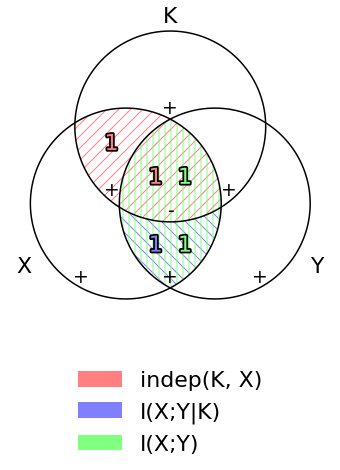

In [26]:
(I(K&X) == 0).venn(I(X&Y|K), I(X&Y), style="hatch")

The above two red cells sum to $I(K;X)=I(K;X|Y)+I(X;Y;Z)=0$, giving $I(X;Y;Z)\le 0$. Hence $I(X;Y)=I(X;Y;K)+I(X;Y|K)\le I(X;Y|K)$. We can also ask the program to prove it for us.

In [27]:
((I(K&X) == 0) >> (I(X&Y|K) >= I(X&Y))).solve(full=True, proof_detail=True)

((  indep(K, X)  )
>> (  I(X&Y) <= I(X&Y|K)  )) is True


I(X&Y)
<= I(K+Y&X)
= I(X&Y|K)   (since indep(K, X) )

------------------

## 2.3 - Information Diagram for 4 Random Variables

Similarly, for $4$ random variables $X,Y,Z,W$, we can assign a number to each of the $15$ cells in the Venn diagram with $4$ sets. The intersection of the 4 sets corresponds to the multivariate mutual information  $I(X;Y;Z;W) = I(X;Y;Z)-I(X;Y;Z|W)$.

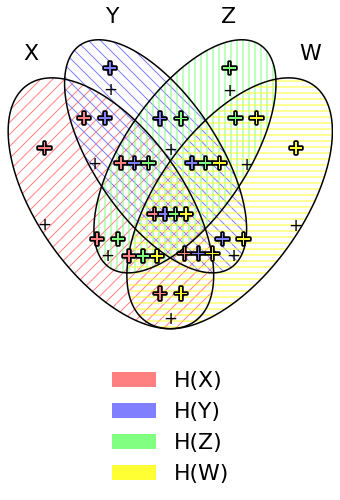

In [12]:
region().venn(H(X), H(Y), H(Z), H(W), style="hatch,pm")

While the Venn diagram looks nice, it is not the easiest diagram to draw by hand. It is perhaps more convenient to use the Karnaugh map [Karnaugh 1953], which can be drawn as a 4x4 table minus one cell. Each random variable corresponds to a 2x4 or 4x2 rectangle.

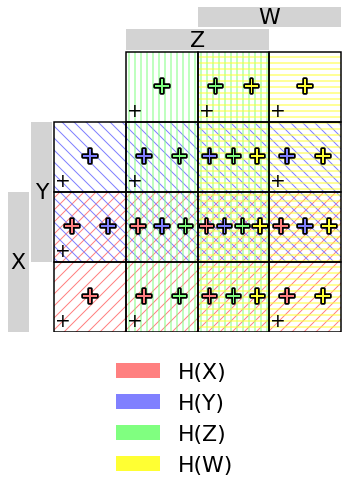

In [13]:
region().table(H(X), H(Y), H(Z), H(W), style="hatch,pm")

There are 5 cells that may be negative. The rest are nonnegative.

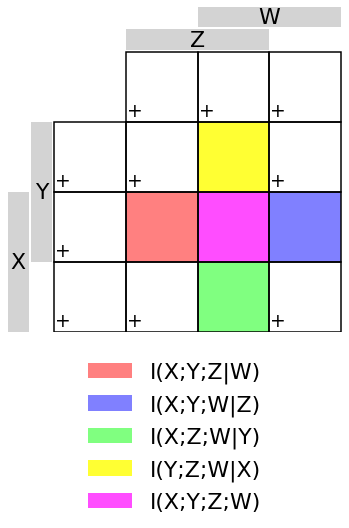

In [14]:
# Iterate through the cells ent_cells(X,Y,Z,W),
# and include those that cannot be proven to be nonnegative
region().table(*[
    t for t in ent_cells(X, Y, Z, W) if not t >= 0
], style="notext")

Even though those 5 cells may be negative, there are certain sums about them that must be nonnegative. For example, we have $I(X;Y)$, which is the sum of 4 cells, is nonnegative. $I(X;Y|Z)$ (sum of 2 cells) is nonnegative as well.

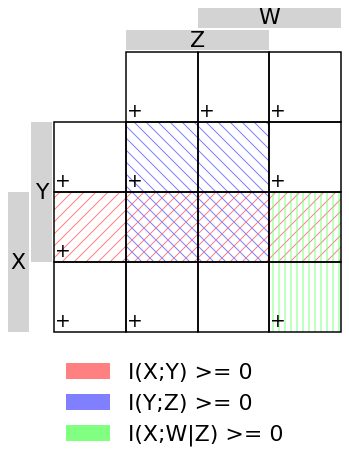

In [15]:
region().table(X, Y, Z, W, I(X&Y)>=0, I(Y&Z)>=0, I(X&W|Z)>=0, style="hatch,notext")

Note that if $X \to Y \to Z \to W$ form a Markov chain, then only 10 cells can be nonzero, and they are all nonnegative.

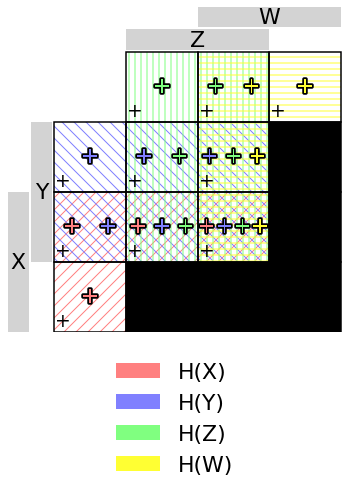

In [29]:
markov(X,Y,Z,W).table(H(X), H(Y), H(Z), H(W), style="hatch,pm")

For example, the data processing inequality says that if $X \to Y \to Z \to W$ form a Markov chain, then $I(X;W)\le I(Y;Z)$. This is evident from the information diagram.

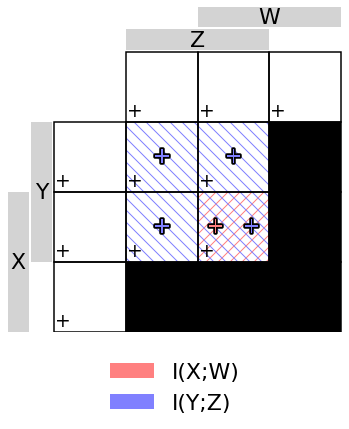

In [28]:
markov(X,Y,Z,W).table(I(X&W), I(Y&Z), style="hatch,pm")

---------------

## 2.4 - Information Diagram for 5 Random Variables

For $5$ random variables $X,Y,Z,W,U$, we require a Venn diagram with $5$ sets and $31$ cells. We can use Grünbaum's Venn diagram [Grünbaum 1999].

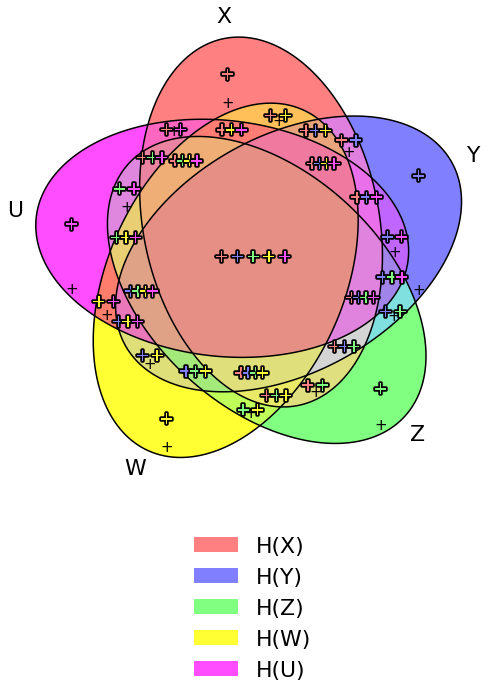

In [17]:
region().venn(H(X), H(Y), H(Z), H(W), H(U), style="blend,pm", figsize=(9,9))

Or the Karnaugh map (the region for $Z$ is two disconnected rectangles).

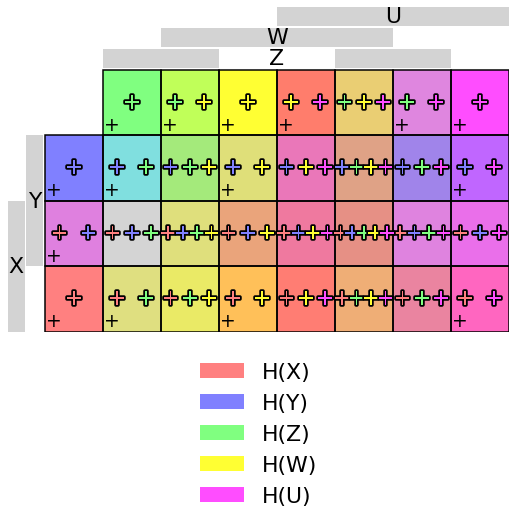

In [18]:
region().table(H(X), H(Y), H(Z), H(W), H(U), style="blend,pm", figsize=(9,6))

#### References

- T. M. Cover and J. A. Thomas, Elements of information theory, John Wiley & Sons, 2006.
- R. W. Yeung, Information theory and network coding, Springer Science & Business Media, 2008.
- K. T. Hu, "On the amount of information," Teoriya Veroyatnostei i ee Primeneniya 7.4 (1962): 447-455.
- W. McGill, "Multivariate information transmission", Psychometrika. 19 (1): 97-116, 1954.
- M. Karnaugh, "The map method for synthesis of combinational logic circuits," Transactions of the American Institute of Electrical Engineers, Part I: Communication and Electronics 72.5: 593-599, 1953.
- B. Grünbaum, "The Search for Symmetric Venn Diagrams," Geombinatorics, 8(4), pp. 104–109, 1999.
